### Volcano Plot ###

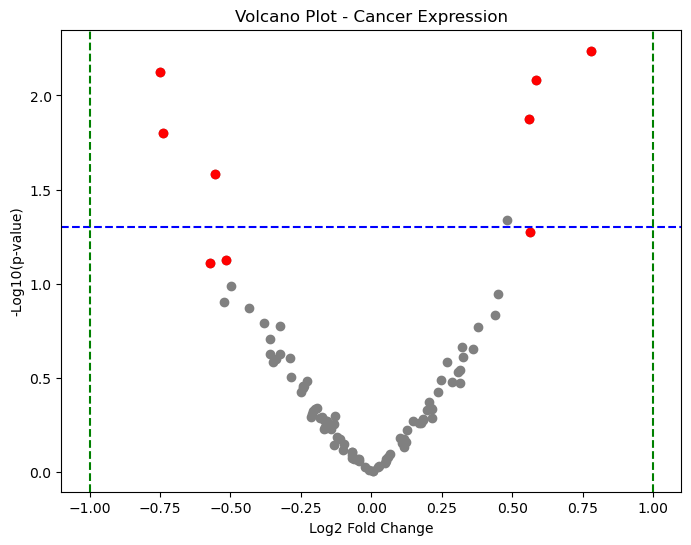

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Read the dataset
data = pd.read_csv("cancer_expression.csv")

# Get control and treatment column names
control = [c for c in data.columns if "Control" in c]
treat = [c for c in data.columns if "Treatment" in c]

# Convert data to numbers (important to avoid errors)
data[control + treat] = data[control + treat].apply(pd.to_numeric, errors='coerce')

# Calculate averages
data["Control_Mean"] = data[control].mean(axis=1)
data["Treatment_Mean"] = data[treat].mean(axis=1)

# Log2 fold change
data["log2FC"] = np.log2((data["Treatment_Mean"] + 1) / (data["Control_Mean"] + 1))

# p-values using t-test
pvals = []
for i in range(len(data)):
    tvals = data.loc[i, treat].astype(float)
    cvals = data.loc[i, control].astype(float)
    t_stat, p_val = ttest_ind(tvals, cvals, equal_var=False)
    pvals.append(p_val)

data["pvalue"] = pvals
data["-log10(p)"] = -np.log10(data["pvalue"])

# Simple volcano plot
plt.figure(figsize=(8,6))
plt.scatter(data["log2FC"], data["-log10(p)"], color="grey")

# Highlight significant genes
sig = data[(data["pvalue"] < 0.1) & (abs(data["log2FC"]) > 0.5)]
plt.scatter(sig["log2FC"], sig["-log10(p)"], color="red")

plt.axhline(-np.log10(0.05), color="blue", linestyle="--")
plt.axvline(-1, color="green", linestyle="--")
plt.axvline(1, color="green", linestyle="--")

plt.title("Volcano Plot - Cancer Expression")
plt.xlabel("Log2 Fold Change")
plt.ylabel("-Log10(p-value)")
plt.show()


### Heat Map ###

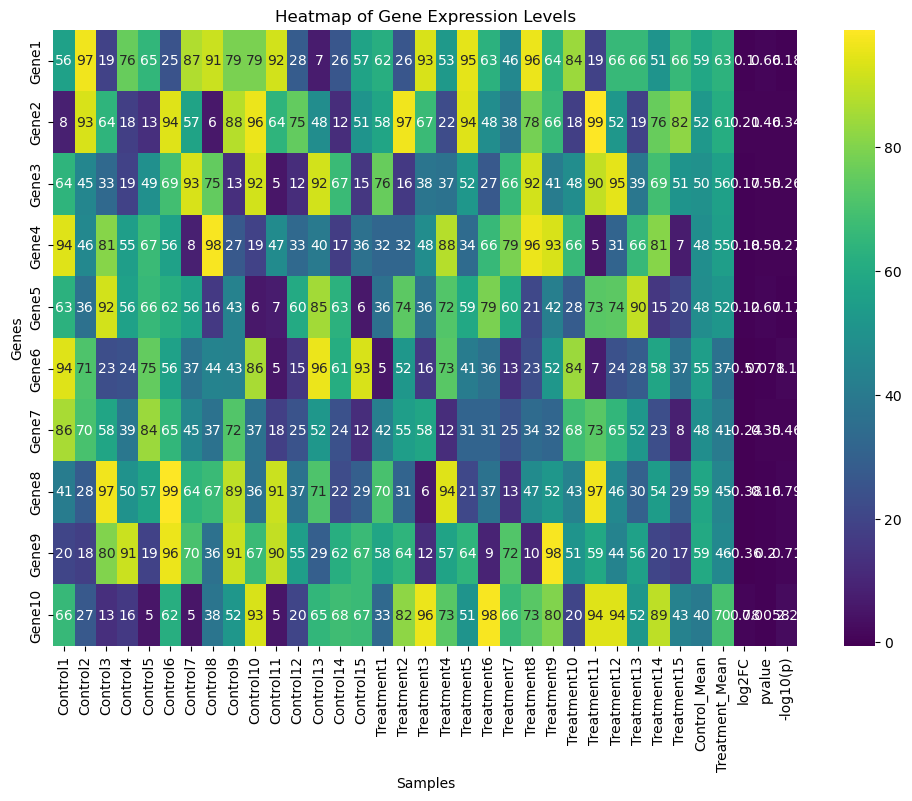

In [ ]:
import seaborn as sns

heatmap_data = data.set_index("Gene")
heatmap=heatmap_data.head(10)

plt.figure(figsize=(12,8))
sns.heatmap(heatmap,cmap="viridis",annot=True)
plt.title("Heatmap of Gene Expression Levels")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.show()

### Spider Net ###

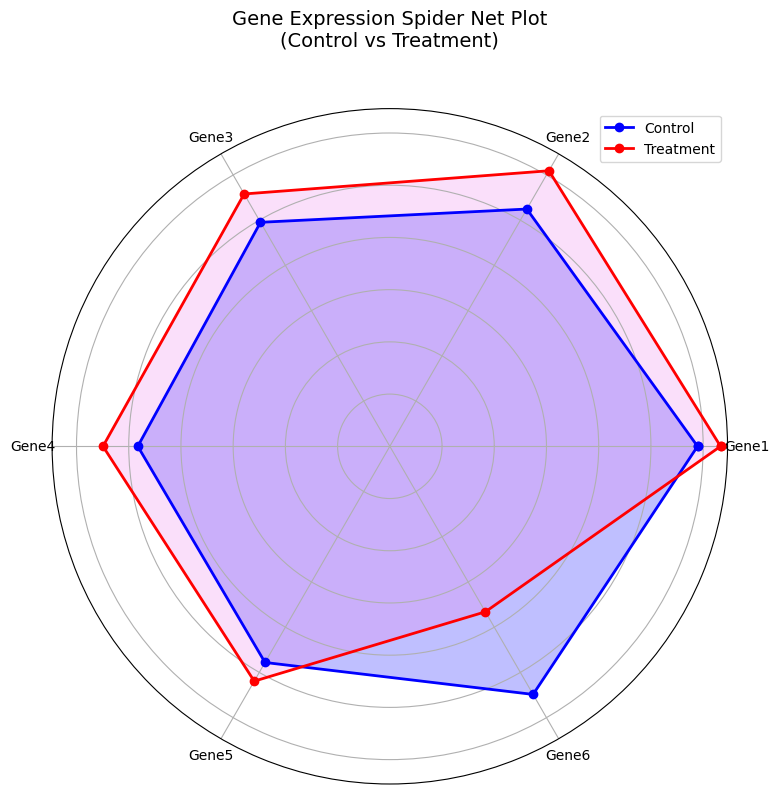

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read your dataset
df = pd.read_csv('cancer_expression.csv')

# Calculate mean expression for control and treatment groups
control_columns = [col for col in df.columns if 'Control' in col]
treatment_columns = [col for col in df.columns if 'Treatment' in col]

# Select first 6 genes for clear visualization
selected_genes = df['Gene'].head(6).tolist()

# Calculate means
control_means = df[df['Gene'].isin(selected_genes)][control_columns].mean(axis=1).values
treatment_means = df[df['Gene'].isin(selected_genes)][treatment_columns].mean(axis=1).values

# Create spider net plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, polar=True)

# Angles for each gene
angles = np.linspace(0, 2*np.pi, len(selected_genes), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# Complete the circle for data
control_means = np.append(control_means, control_means[0])
treatment_means = np.append(treatment_means, treatment_means[0])

# Plot
ax.plot(angles, control_means, 'o-', linewidth=2, label='Control', color='blue')
ax.fill(angles, control_means, alpha=0.25, color='blue')

ax.plot(angles, treatment_means, 'o-', linewidth=2, label='Treatment', color='red')
ax.fill(angles, treatment_means, alpha=0.25, color='violet')

# Add labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(selected_genes)
ax.set_yticklabels([])

plt.title('Gene Expression Spider Net Plot\n(Control vs Treatment)', size=14, y=1.08)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

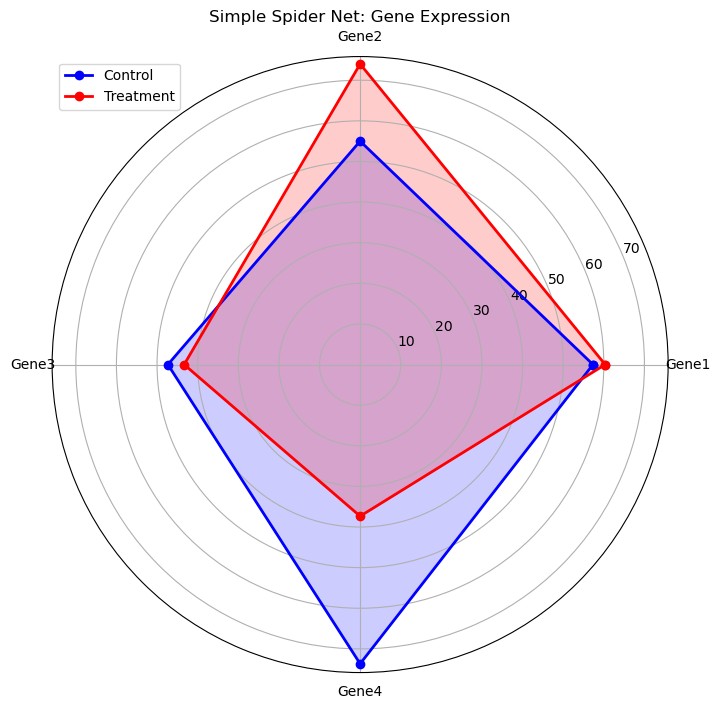

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simple version with just 4 genes
df = pd.read_csv('cancer_expression.csv')

# Select first 4 genes
genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4']
control_data = df[df['Gene'].isin(genes)][['Control1', 'Control2', 'Control3']].mean(axis=1).values
treatment_data = df[df['Gene'].isin(genes)][['Treatment1', 'Treatment2', 'Treatment3']].mean(axis=1).values

# Create plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2*np.pi, len(genes), endpoint=False).tolist()
angles += angles[:1]

control_data = np.append(control_data, control_data[0])
treatment_data = np.append(treatment_data, treatment_data[0])

# Plot
ax.plot(angles, control_data, 'bo-', linewidth=2, label='Control')
ax.plot(angles, treatment_data, 'ro-', linewidth=2, label='Treatment')

# Fill
ax.fill(angles, control_data, alpha=0.2, color='blue')
ax.fill(angles, treatment_data, alpha=0.2, color='red')

# Labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(genes)
plt.title('Simple Spider Net: Gene Expression')
plt.legend()
plt.show()

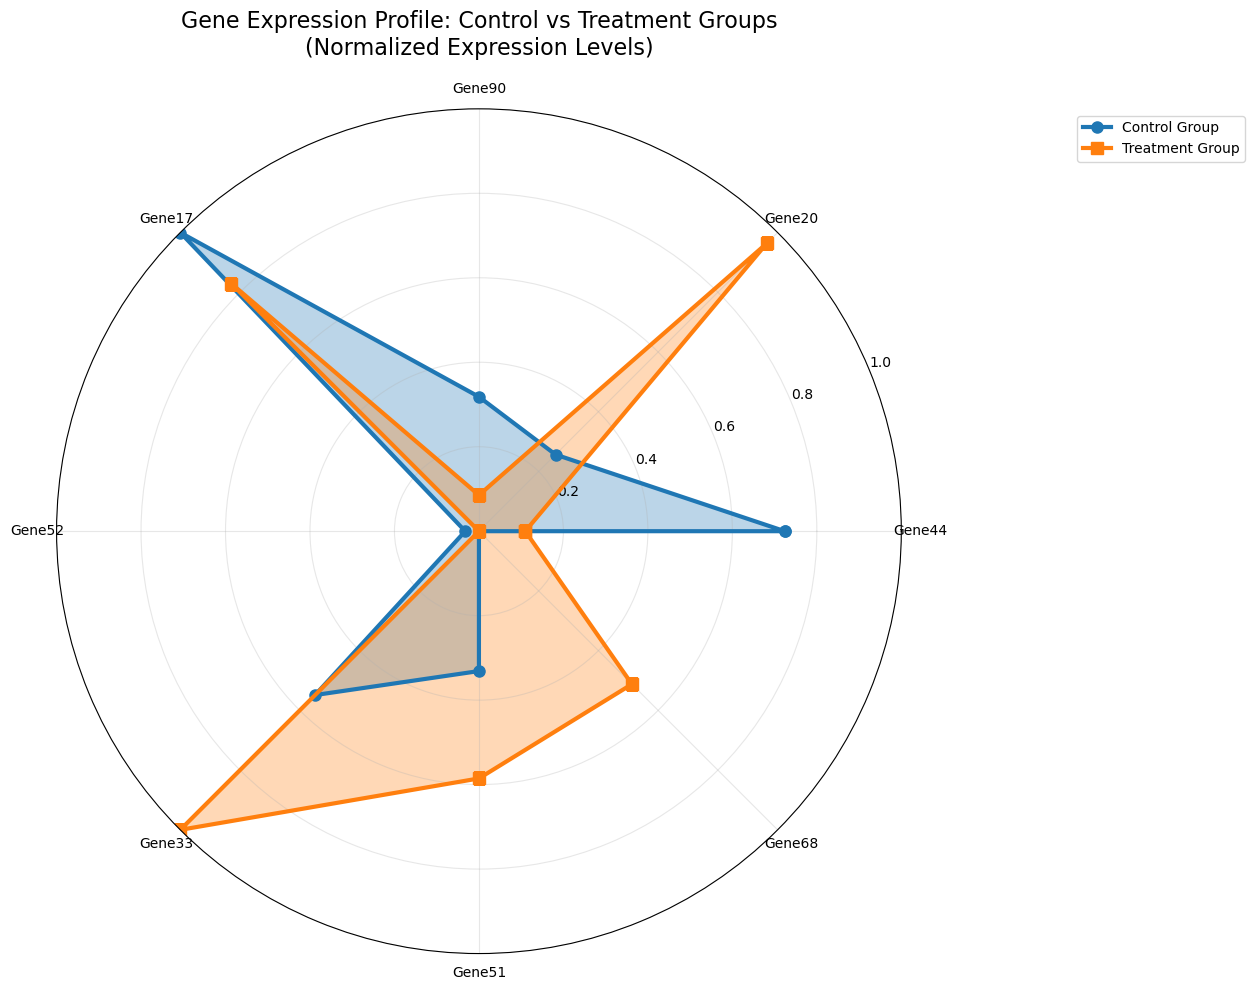

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read data
df = pd.read_csv('cancer_expression.csv')

# Select top 8 genes with highest variation
control_cols = [col for col in df.columns if 'Control' in col]
treatment_cols = [col for col in df.columns if 'Treatment' in col]

# Calculate variance and select top genes
df['Variance'] = df[treatment_cols].var(axis=1)
top_genes = df.nlargest(8, 'Variance')['Gene'].tolist()

# Prepare data
control_means = df[df['Gene'].isin(top_genes)][control_cols].mean(axis=1).values
treatment_means = df[df['Gene'].isin(top_genes)][treatment_cols].mean(axis=1).values

# Normalize data for better visualization (0-1 scale)
def normalize_data(data):
    return (data - data.min()) / (data.max() - data.min())

control_norm = normalize_data(control_means)
treatment_norm = normalize_data(treatment_means)

# Create plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, polar=True)

angles = np.linspace(0, 2*np.pi, len(top_genes), endpoint=False).tolist()
angles += angles[:1]

control_norm = np.append(control_norm, control_norm[0])
treatment_norm = np.append(treatment_norm, treatment_norm[0])

# Plot lines
ax.plot(angles, control_norm, 'o-', linewidth=3, label='Control Group',
        color='#1f77b4', markersize=8)
ax.plot(angles, treatment_norm, 's-', linewidth=3, label='Treatment Group',
        color='#ff7f0e', markersize=8)

# Fill areas
ax.fill(angles, control_norm, alpha=0.3, color='#1f77b4')
ax.fill(angles, treatment_norm, alpha=0.3, color='#ff7f0e')

# Customize plot
ax.set_xticks(angles[:-1])
ax.set_xticklabels(top_genes, fontsize=10)
ax.set_ylim(0, 1)

# Add grid
ax.grid(True, alpha=0.3)

plt.title('Gene Expression Profile: Control vs Treatment Groups\n(Normalized Expression Levels)',
          size=16, pad=20)
plt.legend(bbox_to_anchor=(1.2, 1.0), loc='upper left')
plt.tight_layout()
plt.show()

### Upset Plot ###

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet

# Sample data
data = pd.DataFrame({
    'Gene': ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5'],
    'Control': [1, 1, 0, 1, 0],
    'Treatment': [1, 0, 1, 1, 0],
    'Mutated': [0, 1, 1, 0, 1]
})

upset_data = data.set_index(['Control', 'Treatment', 'Mutated']).groupby(level=[0,1,2]).size()
UpSet(upset_data).plot()
plt.show()

ModuleNotFoundError: No module named 'upsetplot'

### Violin Plot ###

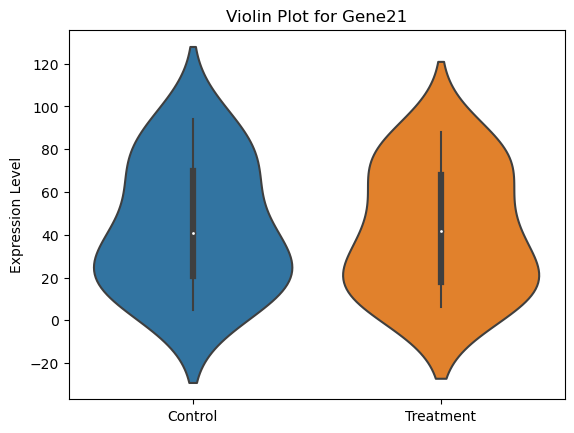

In [ ]:
### Violin Plot ###

#Select the Gene row
gene="Gene21"
gene_row = data[data["Gene"] == gene].iloc[0]

plot_data=[gene_row[control_cols].values,gene_row[treatment_cols].values]


#For plot
sns.violinplot(data=plot_data)

plt.xticks([0,1],["Control","Treatment"])
plt.title(f"Violin Plot for {gene}")
plt.ylabel("Expression Level")
plt.show()

### Box Plot ###

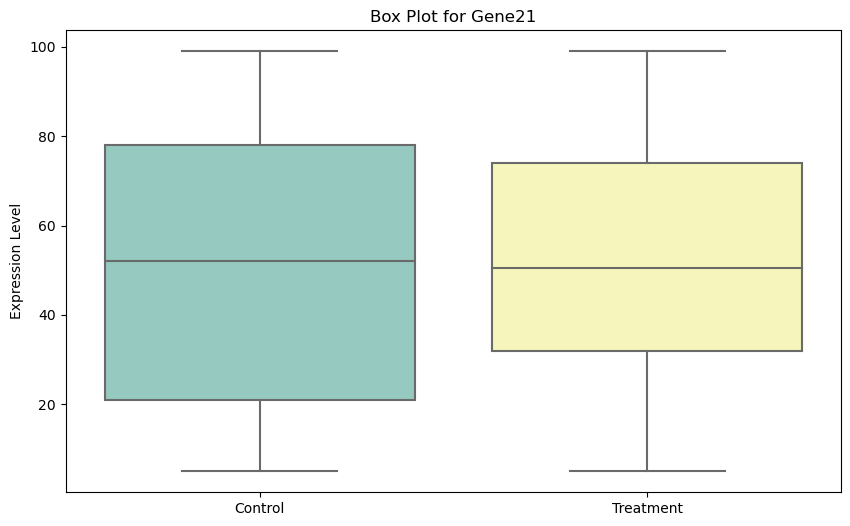

In [ ]:
### Box Plot ###

#Select the Gene row
gene="Gene21"
gene_data=data[data["Gene"]==gene]

#1D array
control_data=data[["Control1","Control2"]].values.flatten()
treatment_data=data[["Treatment1","Treatment2"]].values.flatten()

#For plot
plt.figure(figsize=(10,6))
sns.boxplot(data=[control_data,treatment_data],palette="Set3")

plt.xticks([0,1],["Control","Treatment"])
plt.title(f"Box Plot for {gene}")
plt.ylabel("Expression Level")
plt.show()

### Bar Chart ###

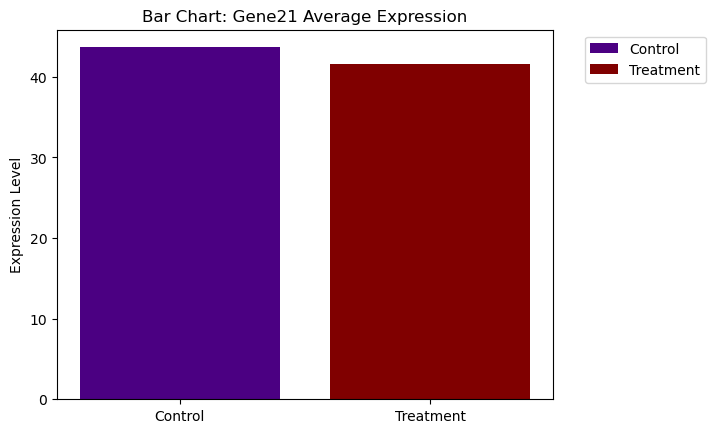

In [ ]:
###Bar Chart###

control_cols=[i for i in data.columns if "Control" in i]
treatment_cols=[i for i in data.columns if "Treatment" in i]

#Select the Gene row
gene="Gene21"
gene_data=data[data["Gene"]==gene]

#Compute Averages
control_mean=gene_data[control_cols].mean(axis=1).values[0]
treatment_mean=gene_data[treatment_cols].mean(axis=1).values[0]

bars=plt.bar(["Control","Treatment"],[control_mean,treatment_mean],color=["indigo","maroon"])
plt.title(f"Bar Chart: {gene} Average Expression")
plt.ylabel("Expression Level")
plt.legend(bars,["Control","Treatment"],bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()

### Horizontal Bar Chart ###

### Group Bar Chart ###

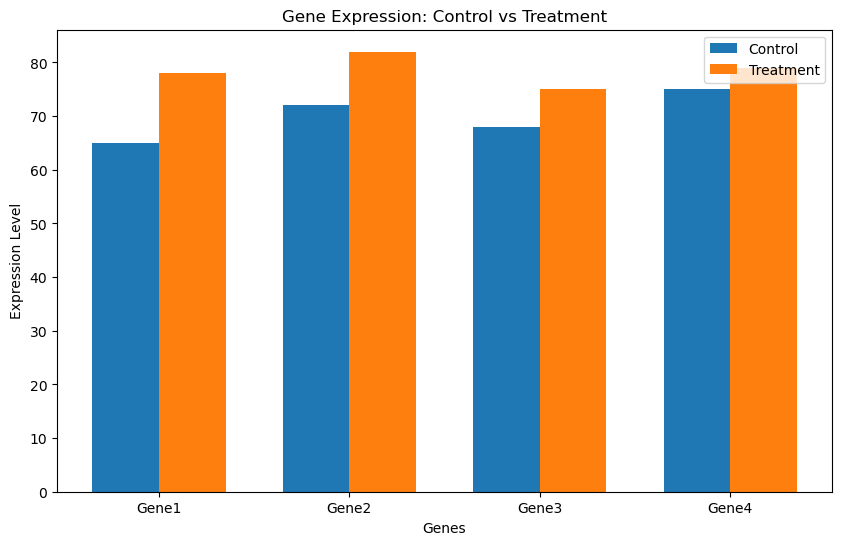

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4']
control_means = [65, 72, 68, 75]
treatment_means = [78, 82, 75, 79]

x = np.arange(len(genes))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, control_means, width, label='Control')
plt.bar(x + width/2, treatment_means, width, label='Treatment')

plt.xlabel('Genes')
plt.ylabel('Expression Level')
plt.title('Gene Expression: Control vs Treatment')
plt.xticks(x, genes)
plt.legend()
plt.show()

### Stacked Bar Chart ###

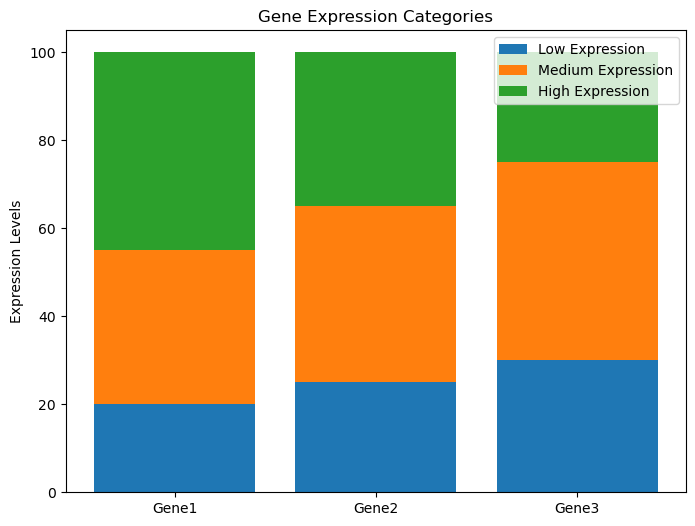

In [ ]:
import matplotlib.pyplot as plt

categories = ['Gene1', 'Gene2', 'Gene3']
low_expr = [20, 25, 30]
medium_expr = [35, 40, 45]
high_expr = [45, 35, 25]

plt.figure(figsize=(8, 6))
plt.bar(categories, low_expr, label='Low Expression')
plt.bar(categories, medium_expr, bottom=low_expr, label='Medium Expression')
plt.bar(categories, high_expr, bottom=np.array(low_expr)+np.array(medium_expr),
        label='High Expression')

plt.ylabel('Expression Levels')
plt.title('Gene Expression Categories')
plt.legend()
plt.show()

### Catplot ###

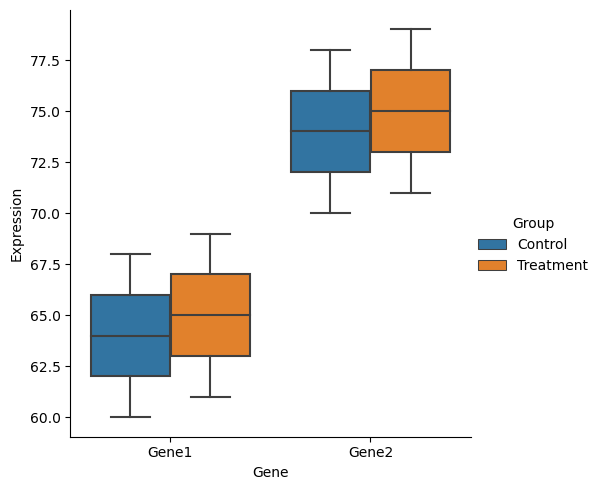

In [ ]:
import seaborn as sns
import pandas as pd

# Create sample data
data = pd.DataFrame({
    'Gene': ['Gene1']*10 + ['Gene2']*10,
    'Expression': list(range(60, 70)) + list(range(70, 80)),
    'Group': ['Control', 'Treatment']*10
})

sns.catplot(x='Gene', y='Expression', hue='Group', data=data, kind='box')
plt.show()

### Lollipop Plot ###

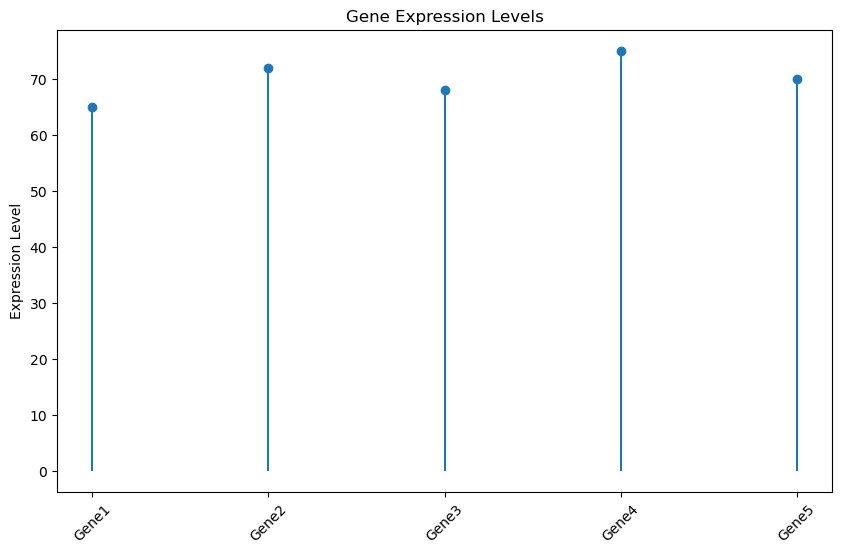

In [ ]:
import matplotlib.pyplot as plt

genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5']
expression = [65, 72, 68, 75, 70]

plt.figure(figsize=(10, 6))
plt.stem(genes, expression, basefmt=" ")
plt.ylabel('Expression Level')
plt.title('Gene Expression Levels')
plt.xticks(rotation=45)
plt.show()

### Honey Bee Plot ###

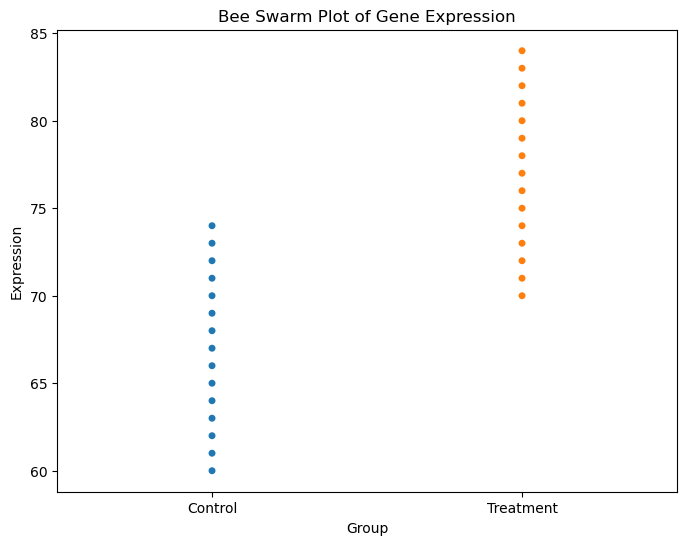

In [ ]:
import seaborn as sns
import pandas as pd

data = pd.DataFrame({
    'Group': ['Control']*15 + ['Treatment']*15,
    'Expression': list(range(60, 75)) + list(range(70, 85))
})

plt.figure(figsize=(8, 6))
sns.swarmplot(x='Group', y='Expression', data=data)
plt.title('Bee Swarm Plot of Gene Expression')
plt.show()

### Venn diagram ###

In [ ]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
venn2(subsets=(10, 8, 5), set_labels=('Control', 'Treatment'))
plt.title('Overlap of Expressed Genes')
plt.show()

ModuleNotFoundError: No module named 'matplotlib_venn'

### Bubble Plot ###

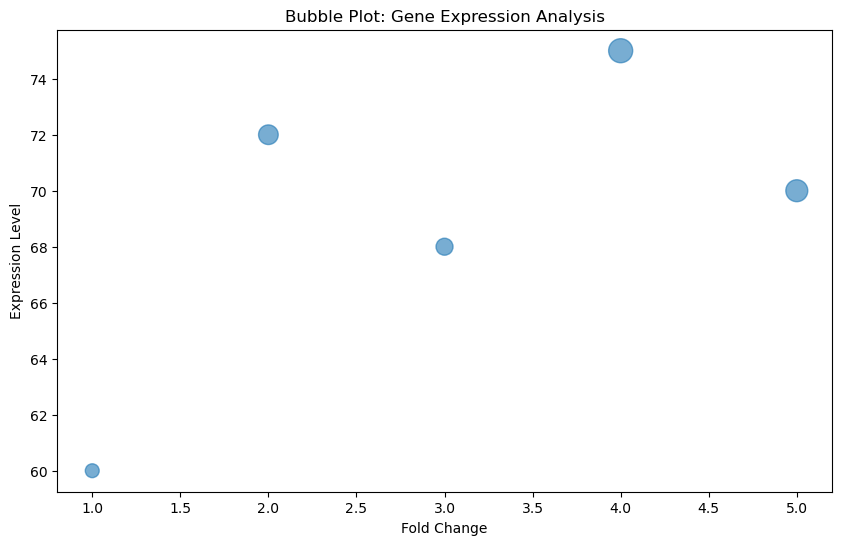

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]  # Fold change
y = [60, 72, 68, 75, 70]  # Expression level
sizes = [100, 200, 150, 300, 250]  # Significance

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=sizes, alpha=0.6)
plt.xlabel('Fold Change')
plt.ylabel('Expression Level')
plt.title('Bubble Plot: Gene Expression Analysis')
plt.show()

### Binomial Plot ###

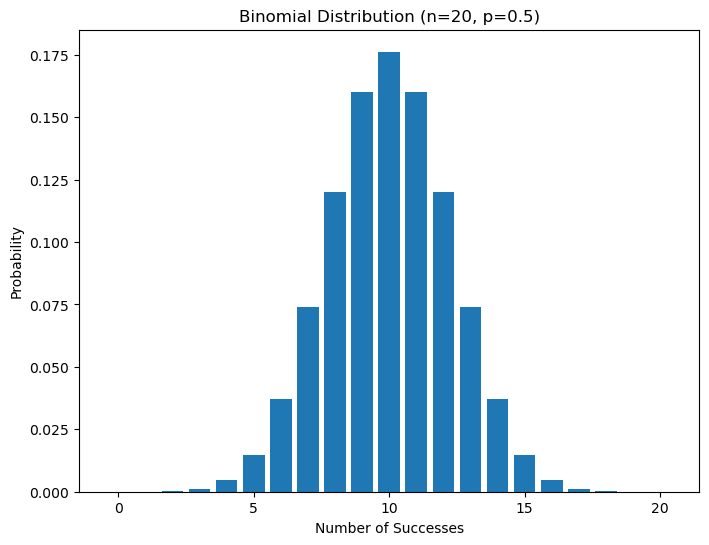

In [ ]:
from scipy.stats import binom
import matplotlib.pyplot as plt

n, p = 20, 0.5  # trials, probability
x = range(n+1)
probabilities = [binom.pmf(i, n, p) for i in x]

plt.figure(figsize=(8, 6))
plt.bar(x, probabilities)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n=20, p=0.5)')
plt.show()

### Poison Plot ###

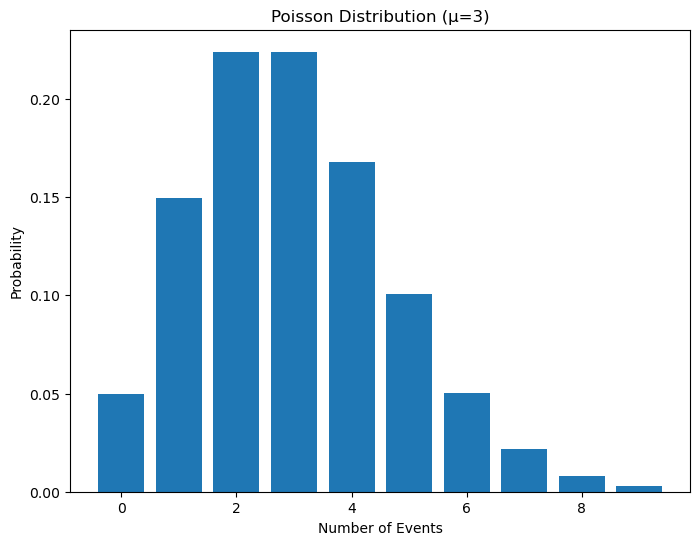

In [ ]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

mu = 3  # mean
x = range(10)
probabilities = [poisson.pmf(i, mu) for i in x]

plt.figure(figsize=(8, 6))
plt.bar(x, probabilities)
plt.xlabel('Number of Events')
plt.ylabel('Probability')
plt.title('Poisson Distribution (μ=3)')
plt.show()

### Normal Distribution ###

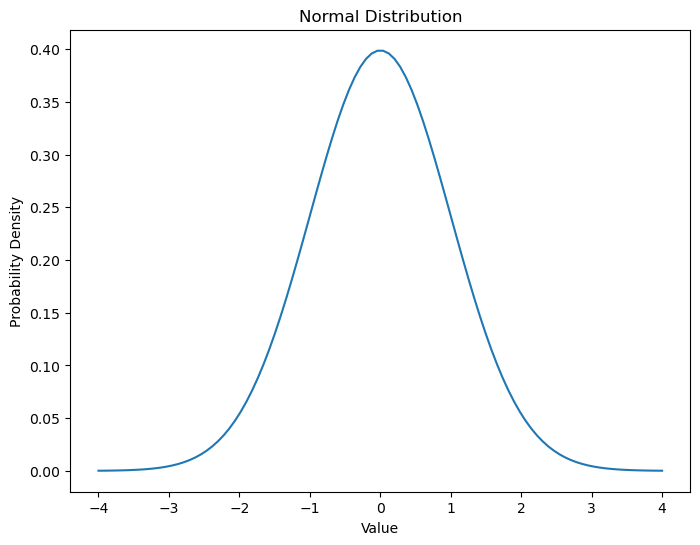

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

x = np.linspace(-4, 4, 100)
y = norm.pdf(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.show()

### Line Chart ###

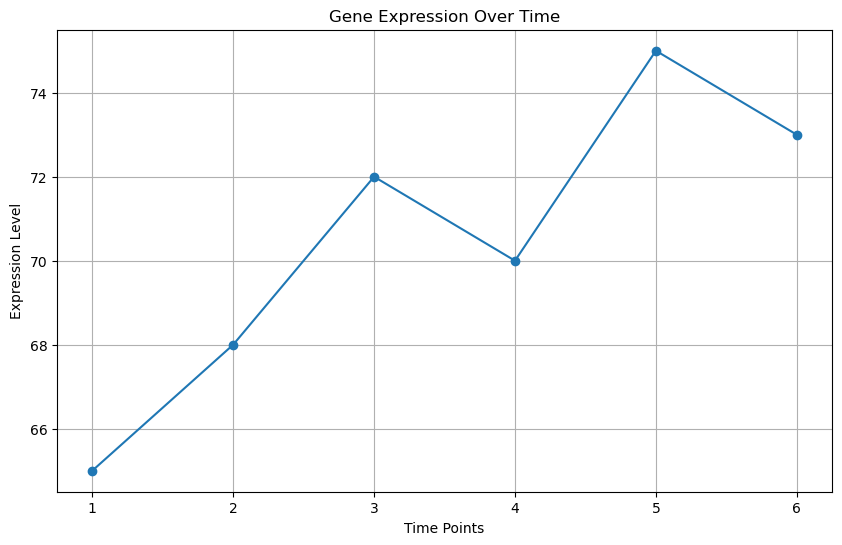

In [ ]:
import matplotlib.pyplot as plt

time_points = [1, 2, 3, 4, 5, 6]
expression_levels = [65, 68, 72, 70, 75, 73]

plt.figure(figsize=(10, 6))
plt.plot(time_points, expression_levels, marker='o')
plt.xlabel('Time Points')
plt.ylabel('Expression Level')
plt.title('Gene Expression Over Time')
plt.grid(True)
plt.show()

### Broken Line Chart ###

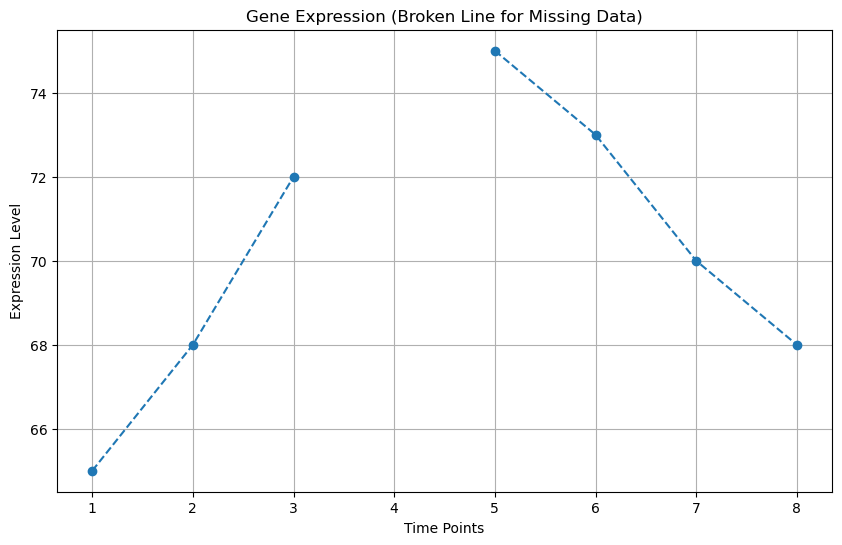

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [65, 68, 72, None, 75, 73, 70, 68]  # Missing data point

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='--')
plt.xlabel('Time Points')
plt.ylabel('Expression Level')
plt.title('Gene Expression (Broken Line for Missing Data)')
plt.grid(True)
plt.show()

### Trend Line Chart ###

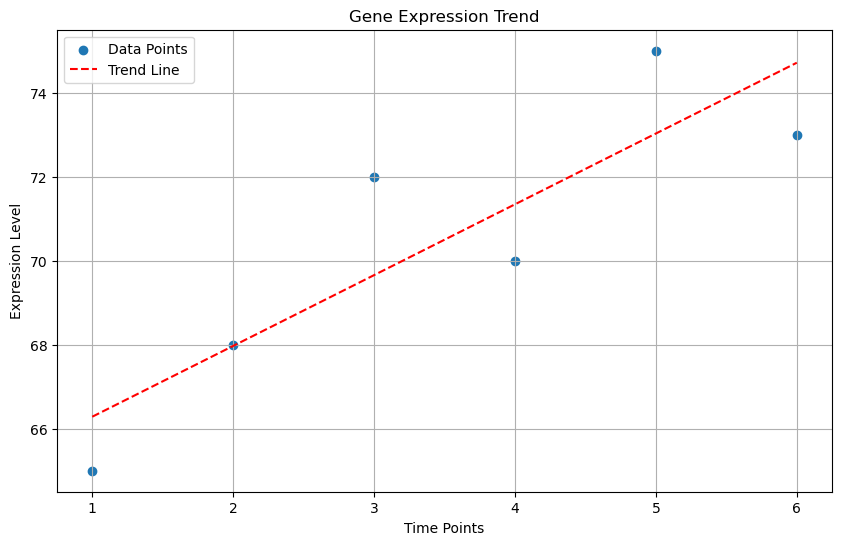

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5, 6])
y = np.array([65, 68, 72, 70, 75, 73])

# Calculate trend line
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points')
plt.plot(x, p(x), 'r--', label='Trend Line')
plt.xlabel('Time Points')
plt.ylabel('Expression Level')
plt.title('Gene Expression Trend')
plt.legend()
plt.grid(True)
plt.show()

### Circus Plot ###

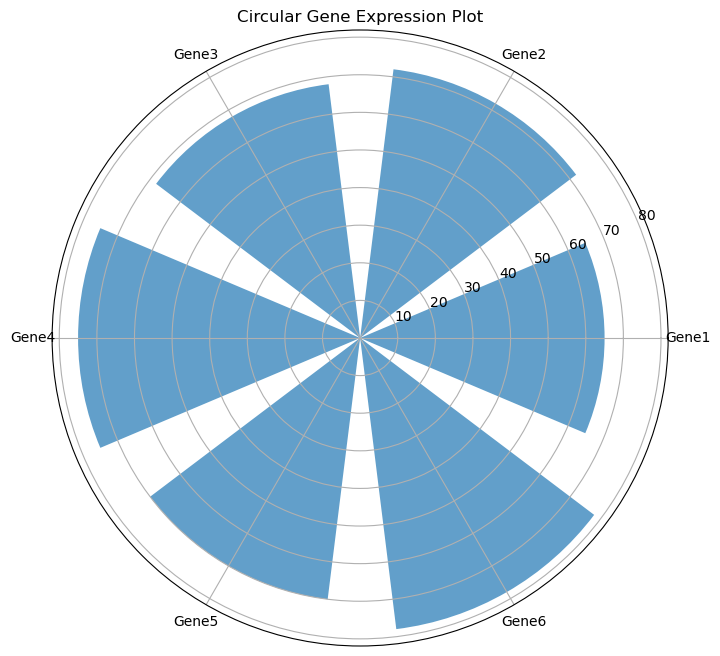

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

genes = ['Gene1', 'Gene2', 'Gene3', 'Gene4', 'Gene5', 'Gene6']
expression = [65, 72, 68, 75, 70, 78]

angles = np.linspace(0, 2*np.pi, len(genes), endpoint=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
bars = ax.bar(angles, expression, alpha=0.7)
ax.set_xticks(angles)
ax.set_xticklabels(genes)
plt.title('Circular Gene Expression Plot')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from upsetplot import UpSet, from_indicators

# Read dataset
data = pd.read_csv('data.csv')

# ================= Volcano Plot =================
data['minus_log10_p'] = -np.log10(data['pvalue'])
plt.figure(figsize=(8,6))
plt.scatter(data['log2FC'], data['minus_log10_p'], color='grey')
sig = data[(data['pvalue'] < 0.05) & (abs(data['log2FC']) > 1)]
plt.scatter(sig['log2FC'], sig['minus_log10_p'], color='red')
plt.xlabel('log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.show()

# ================= Violin Plot =================
plt.figure(figsize=(8,6))
sns.violinplot(x='Group', y='Expression', data=data)
plt.title('Violin Plot')
plt.show()

# ================= Spider Plot =================
categories = ['Gene1','Gene2','Gene3','Gene4','Gene5']
values = [5, 3, 4, 2, 4]
N = len(categories)
angles = np.linspace(0, 2*np.pi, N, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]
plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Spider Plot')
plt.show()

# ================= Heatmap =================
heatmap_data = data.pivot(index='Gene', columns='Sample', values='Expression')
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True)
plt.title('Heatmap')
plt.show()

# ================= UpSet Plot =================
sets_data = data[['SetA','SetB','SetC']]
upset_data = from_indicators(sets_data, data.index)
UpSet(upset_data).plot()
plt.show()


NameError: name 'Gene' is not defined

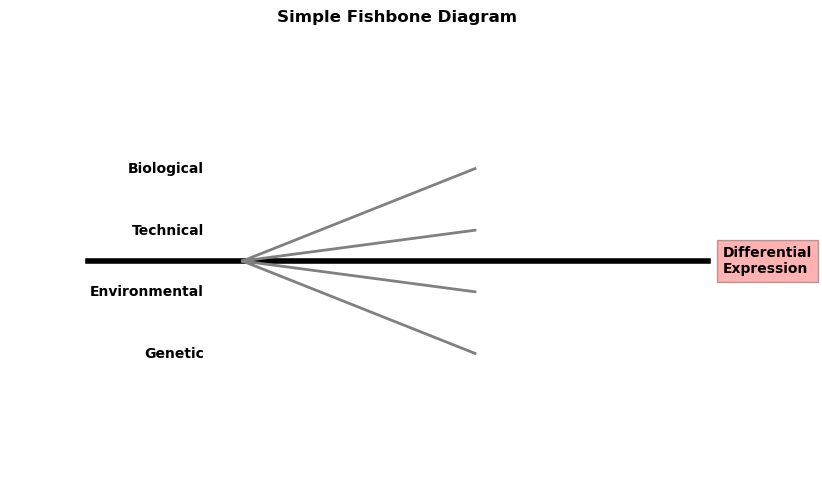

In [ ]:
def minimal_fishbone():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Main line
    ax.axhline(y=0, color='black', linewidth=4, xmin=0.1, xmax=0.9)

    # Category lines
    categories = ['Genetic', 'Environmental', 'Technical', 'Biological']
    for i, category in enumerate(categories):
        y_pos = (i - 1.5) * 0.8
        # Diagonal line
        ax.plot([0.3, 0.6], [0, y_pos], 'gray', linewidth=2)
        # Label
        ax.text(0.25, y_pos, category, ha='right', va='center', fontweight='bold')

    # Problem
    ax.text(0.92, 0, 'Differential\nExpression', ha='left', va='center',
            fontweight='bold', bbox=dict(facecolor='red', alpha=0.3))

    ax.set_xlim(0, 1)
    ax.set_ylim(-3, 3)
    ax.axis('off')
    plt.title('Simple Fishbone Diagram', fontweight='bold')
    plt.show()

minimal_fishbone()